## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [4]:
inp0 = pd.read_csv("day.csv")

In [5]:
inp0.head(200)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15-07-2018,3,0,7,0,0,0,1,27.196653,31.21855,59.1250,12.249811,1318,4220,5538
196,197,16-07-2018,3,0,7,0,1,1,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
197,198,17-07-2018,3,0,7,0,2,1,1,29.485847,33.49165,60.4167,16.417211,2006,3296,5302
198,199,18-07-2018,3,0,7,0,3,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458


In [6]:
inp0.shape

(730, 16)

In [7]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Number of features in detaset
numeric_columns = inp0.select_dtypes(include=np.number).columns.tolist()
print('numerical features: {}'.format(str(len(numeric_columns))))
categorical_columns = inp0.select_dtypes(include=object).columns.tolist()
print('Categorical features: {}'.format(str(len(categorical_columns))))

numerical features: 15
Categorical features: 1


In [9]:
categorical_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
numeric_features = ['temp', 'atemp', 'hum', 'windspeed','cnt']

### Analysing missing values

In [10]:
missingValues= inp0.isnull().sum()
missingValues_percentage = inp0.isnull().sum() / len(inp0) * 100

In [11]:
missing_values_df = pd.concat([missingValues,missingValues_percentage], axis=1)

In [12]:
missing_values_df.rename(columns = {0: 'NA Count', 1: 'Missing Percentage'}, inplace = True)

In [13]:
missing_values_df.sort_values(by=['Missing Percentage'], ascending=False,inplace=True)
missing_values_df[missing_values_df['Missing Percentage']>0]

,NA Count,Missing Percentage


### Data preprecessing

In [14]:
inp0.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

In [15]:
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
'''def getSeason(month) : 
    # month list
    mnthlist = [[12 , 1 , 2], [3 , 4 , 5],  
             [6 , 7 , 8], [9 , 10 , 11]] 
    if month in mnthlist[0] : 
        return ( "Winter" ) 
    elif month in mnthlist[1] : 
        return ( "Spring" ) 
    elif month in mnthlist[2] : 
        return ( "Summer" ) 
    elif month in mnthlist[3] : 
        return ( "Autumn" ) 
    else : 
        return ( "Invalid Month Number" ) 
    
def getDay(dayOfWeek) : 
    if dayOfWeek == 1: 
        return ( "Mon" ) 
    elif dayOfWeek == 2: 
        return ( "Tue" ) 
    elif dayOfWeek == 3: 
        return ( "Wed" ) 
    elif dayOfWeek == 4: 
        return ( "Thu" ) 
    elif dayOfWeek == 5: 
        return ( "Fri" ) 
    elif dayOfWeek == 6: 
        return ( "Sat" ) 
    elif dayOfWeek == 7: 
        return ( "Sun" ) 
    else : 
        return ( "Invalid day Of week" )
'''

In [ ]:
#inp0['weekday'] = inp0['weekday'].apply(getDay)
#inp0['season'] = inp0['mnth'].apply(getSeason)

In [ ]:
inp0.head(200)

In [ ]:
# Converting integrers to month name
import calendar
#inp0['mnth'] = inp0['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
### Dropping unnecessary columns.
inp0.drop(columns=["instant","dteday","casual","registered"], axis=1, inplace=True)

In [107]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed','cnt']
a = ['temp', 'atemp','cnt']

#### Visualising Numeric Variables



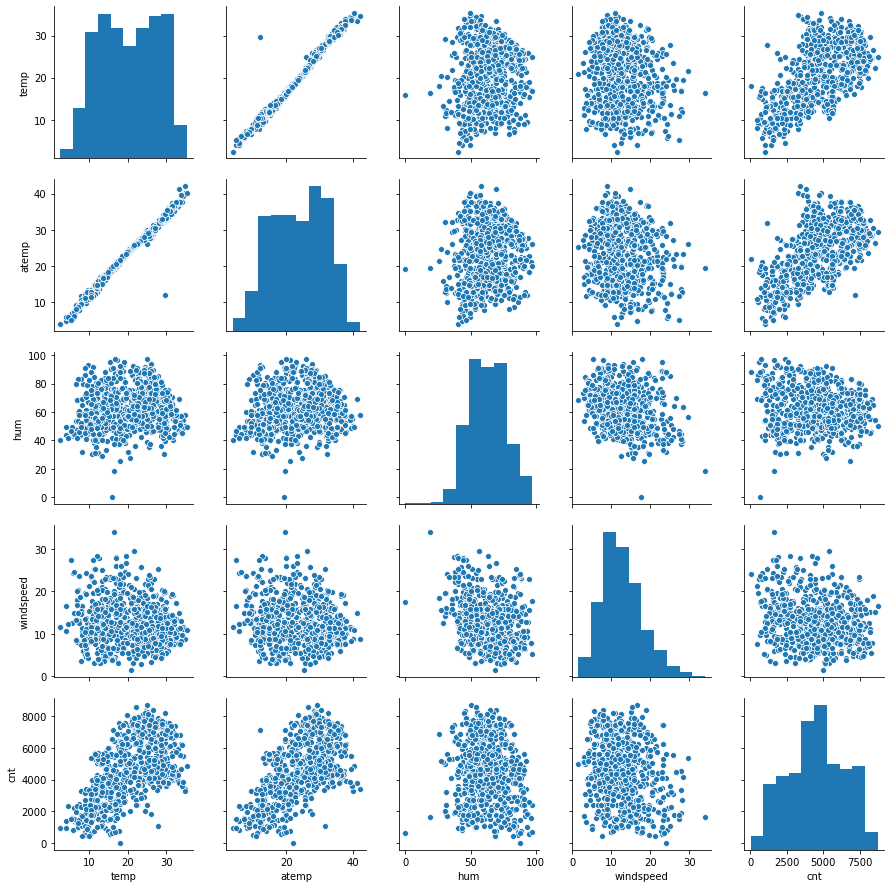

In [18]:
sns.pairplot(inp0[numeric_features])
plt.show()

In [19]:
inp0['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

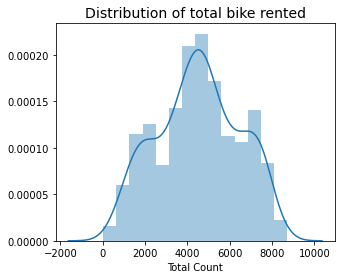

In [93]:
plt.figure(figsize = (5,4))
sns.distplot(inp0.cnt)
plt.title('Distribution of total bike rented', fontsize=14)
plt.xlabel("Total Count")
plt.show()

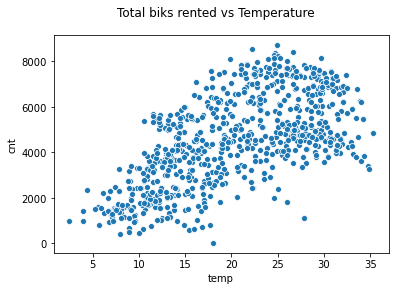

In [21]:
sns.scatterplot(data=inp0, x="temp", y="cnt")
plt.suptitle('Total biks rented vs Temperature')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

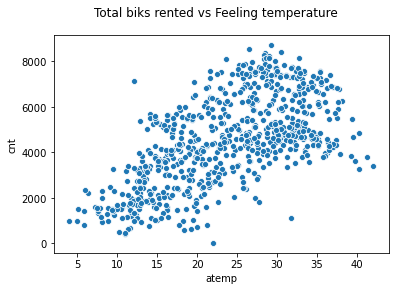

In [22]:
sns.scatterplot(data=inp0, x="atemp", y="cnt")
plt.suptitle('Total biks rented vs Feeling temperature')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

*Inference*
- Peopel are rnting bike more when the temperature is high
- Linear relationship is observed between temperature and total number of bike rented.
- There is multicolinerarity between temperature and feel temperature, hence we can consider using one of these variable for model building

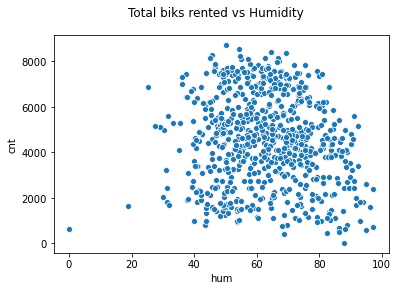

In [23]:
sns.scatterplot(data=inp0, x="hum", y="cnt")
plt.suptitle('Total biks rented vs Humidity')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

*Inference*
- similar to temperature people are rnting bike more when the humidity is high
- Places with lower humidity comparetivly having very less number of bike renting.

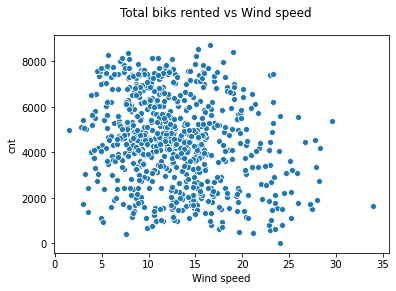

In [104]:
sns.scatterplot(data=inp0, x="windspeed", y="cnt")
plt.suptitle('Total biks rented vs Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('cnt')
plt.show()

*Inference*
- Number of bike renting is less when there is high wind speed

#### Visualising Categorical Variables



In [25]:
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [94]:
inp0["season"].value_counts(normalize=True)

3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64

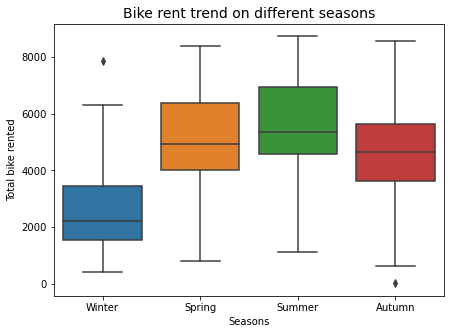

In [29]:
plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="season", y="cnt",estimator=np.median)
ax= sns.boxplot(data=inp0, x="season", y="cnt")
plt.xlabel("Seasons")
plt.ylabel("Total bike rented")
plt.title('Bike rent trend on different seasons', fontsize=14)
ax.set_xticklabels(['Winter','Spring','Summer','Autumn'])
#plt.yticks(rotation=45, horizontalalignment="right")
plt.show()

*Inference*
- Spring and summer are having most number of bike rented.
- People are prefering clean weather for bike riding. 
- Very people are renting bikes during winter season. 

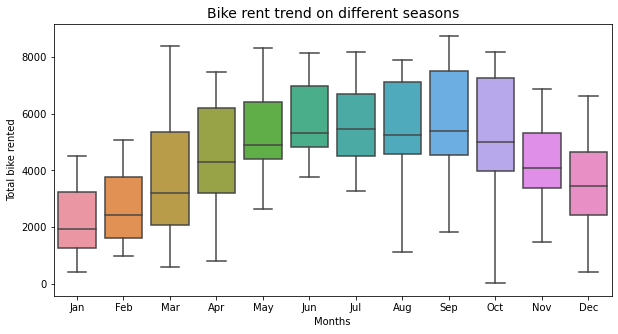

In [99]:
plt.figure(figsize = (10,5))
#ax = sns.barplot(data=inp0, x="mnth", y="cnt",estimator=np.median)
ax= sns.boxplot(data=inp0, x="mnth", y="cnt")
plt.xlabel("Months")
plt.ylabel("Total bike rented")
plt.title('Bike rent trend on different seasons', fontsize=14)
#plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

*Inference*
- There is also multicolinearity observed between months and season.
- During winter (December, January, February) the number of bike renting is less compare to spring and summer

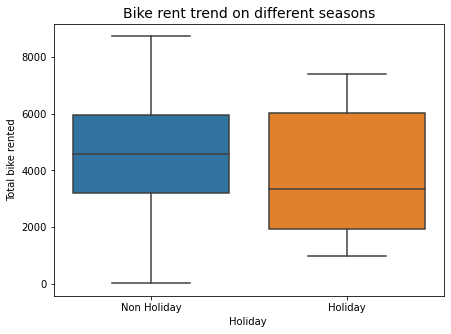

In [100]:
plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="holiday", y="cnt",estimator=np.median)
ax = sns.boxplot(data=inp0, x="holiday", y="cnt")
plt.xlabel("Holiday ")
plt.ylabel("Total bike rented")
plt.title('Bike rent trend on different seasons', fontsize=14)
#plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Non Holiday','Holiday'])
plt.show()

*Inference*
- Number of bike renting is higher on non holidays. 
- Prople renting bikes for there daily commutes to work places.

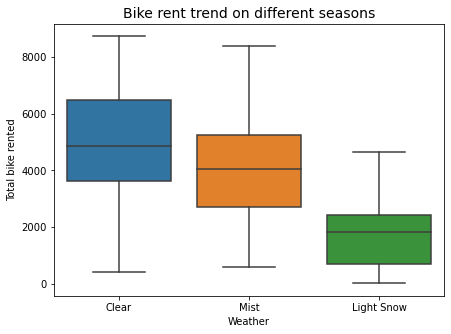

In [101]:
plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="holiday", y="cnt",estimator=np.median)
ax = sns.boxplot(data=inp0, x="weathersit", y="cnt")
plt.xlabel("Weather")
plt.ylabel("Total bike rented")
plt.title('Bike rent trend on different seasons', fontsize=14)
#plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Clear','Mist','Light Snow'])
plt.show()



*Inference*
- It was observed from the season analysis that clear weather is preferred and numbers of bike renting is quite higher than mist and cold. 

In [103]:
'''fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10, 5))
ax = sns.boxplot(data=inp0, x="casual", y="cnt",ax=ax)
ax.set_title("casual")
ax = sns.boxplot(data=inp0, x="registered", y="cnt",ax=ax2)
ax2.set_title("registered")
plt.show()'''

'fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10, 5))\nax = sns.boxplot(data=inp0, x="casual", y="cnt",ax=ax)\nax.set_title("casual")\nax = sns.boxplot(data=inp0, x="registered", y="cnt",ax=ax2)\nax2.set_title("registered")\nplt.show()'

### Correlation Analysis

In [34]:
corr_matrix = inp0[numeric_features].corr()

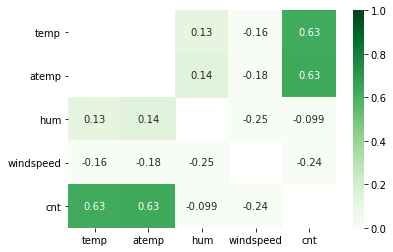

In [109]:
filtered_corr = corr_matrix[corr_matrix<=.9]
#plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, cmap="Greens",  annot = True,vmax=1.0, vmin=0.0)
plt.show()

In [36]:
indices = np.where(corr_matrix > 0.5)
indices = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [37]:
indices

[('temp', 'atemp'), ('temp', 'cnt'), ('atemp', 'cnt')]

*Inference*
- Wind speed and humidity will be used for model building. 
- Temperature and feeling temperature are highly correlated with count of bike rented. Hence, only one column will be selected focussed on dimentionality reduction.

In [38]:
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
inp0.drop(columns=["atemp"], axis=1, inplace=True)

In [40]:
inp0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


### Splitting the Data into Training and Testing Sets


In [41]:
np.random.seed(0)
df_train, df_test = train_test_split(inp0, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features 

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
numeric_features = ['temp', 'hum', 'windspeed','cnt']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
653,4,1,10,0,3,1,1,0.509887,0.575354,0.300794,0.864243
576,3,1,7,0,3,1,1,0.815169,0.725633,0.264686,0.827658
426,1,1,3,0,0,0,2,0.442393,0.640189,0.255342,0.465255
728,1,1,12,0,1,1,1,0.245101,0.498067,0.663106,0.204096
482,2,1,4,0,0,0,2,0.395666,0.504508,0.188475,0.482973


In [44]:
df_train[numeric_features].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


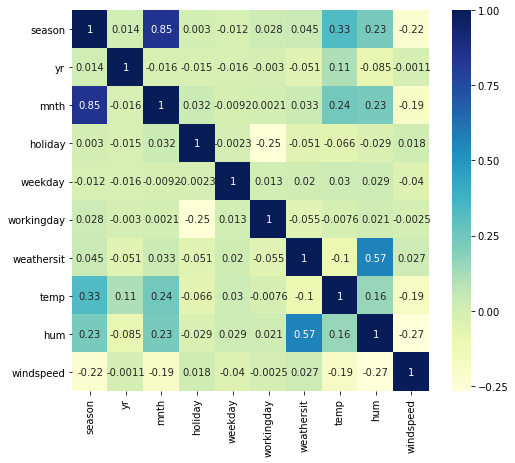

In [115]:
# Recalculating correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (8, 7))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [46]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

*Recursive feature elimination (RFE) for dimentionality reduction*

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [50]:
# Selecting variables having RFE support
col = X_train.columns[rfe.support_]
col

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]


Index([], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
# The summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.24e-167
Time:                        13:20:16   Log-Likelihood:                 448.77
No. Observations:                 510   AIC:                            -875.5
Df Residuals:                     499   BIC:                            -829.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2678      0.030      8.976      0.0

- `Month` is insignificant in presence of other variables with p-value 0.567; can be dropped

In [56]:
X_train_1 = X_train_rfe.drop(["mnth"], axis = 1)

In [57]:
# Building model without month variable
X_train_lm = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [58]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [59]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.49e-168
Time:                        13:21:17   Log-Likelihood:                 448.60
No. Observations:                 510   AIC:                            -877.2
Df Residuals:                     500   BIC:                            -834.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.030      8.998      0.0

- `Month` is insignificant in presence of other variables; can be dropped
- After removing month there is no change in Adjusted R-squard value. 

In [60]:
X_train_2 = X_train_1.drop(["weekday"], axis = 1)

In [61]:
# Building model without weekday variable
X_train_lm = sm.add_constant(X_train_2)
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [62]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.86e-169
Time:                        13:21:20   Log-Likelihood:                 447.95
No. Observations:                 510   AIC:                            -877.9
Df Residuals:                     501   BIC:                            -839.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.029      9.480      0.0

- `weekday` is insignificant in presence of other variables; can be dropped
- After removing month there is no change in Adjusted R-squard but R-Squard reduced by 0.001

In [63]:
X_train_3 = X_train_2.drop(["workingday"], axis = 1)

In [64]:
# Building model without weekday variable
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_3)
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [65]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.90e-170
Time:                        13:21:31   Log-Likelihood:                 446.23
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     502   BIC:                            -842.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2625      0.028      9.290      0.0

- `workingday` is insignificant in presence of other variables; can be dropped
- After removing month there is no change in Adjusted R-squard became 0.795 and R-Squard became 0.798

In [66]:
#dropping humidity
X_train_4 = X_train_3.drop(["hum"], axis = 1)

In [67]:
# Building model without humidity variable
X_train_lm = sm.add_constant(X_train_4)
lm5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     325.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.21e-169
Time:                        13:21:33   Log-Likelihood:                 442.93
No. Observations:                 510   AIC:                            -871.9
Df Residuals:                     503   BIC:                            -842.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2176      0.022      9.773      0.0

- `Humidity` is insignificant in presence of other variables; can be dropped
- After removing month Adjusted R-squard became 0.793 and R-Squard became 0.795

### VIF calculation for the final model

In [69]:
X_train_4 = X_train_4.drop(['const'], axis=1)

KeyError: "['const'] not found in axis"

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,6.22
4,temp,6.16
3,weathersit,5.43
5,windspeed,3.52
1,yr,2.00
2,holiday,1.03


### Dropping the variable and updating the model

calculated VIF shows `season`is are still insignificant. We will go ahead and drop this variables

In [71]:
X_train_5 = X_train_4.drop(["season"], axis = 1)

In [72]:
X_train_lm = sm.add_constant(X_train_5)
lm6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     315.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.38e-152
Time:                        13:22:02   Log-Likelihood:                 400.03
No. Observations:                 510   AIC:                            -788.1
Df Residuals:                     504   BIC:                            -762.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2944      0.023     13.036      0.0

In [73]:
#X_train_5 = X_train_5.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,weathersit,4.72
3,temp,4.13
4,windspeed,3.52
0,yr,1.99
1,holiday,1.02


- After removing season there is no change in Adjusted R-squard reduced to 0.755 and R-Squard became 0.758

## Residual Analysis of the train data

In [74]:
y_train_cnt = lm6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

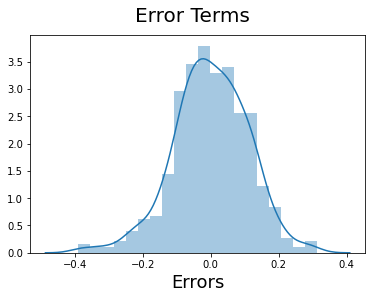

In [75]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

- According to assumptions of linear regression we can see that the error terms are also normally distributed for our final model

## Making Predictions Using the Final Model

#### Applying the scaling on the test sets


In [76]:
numeric_features = ['temp', 'hum', 'windspeed','cnt']
df_test[numeric_features] = scaler.fit_transform(df_test[numeric_features])

df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
184,3,0,7,1,3,0,2,0.837241,0.534223,0.149393,0.704300
535,2,1,6,0,4,1,1,0.911423,0.470417,0.231142,0.725421
299,4,0,10,0,6,0,2,0.496221,0.777843,0.443398,0.278853
221,3,0,8,0,5,1,1,0.890387,0.236659,0.449707,0.545512
152,2,0,6,0,6,0,1,0.821739,0.070765,0.682387,0.569148


In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
X_train_5.columns

Index(['yr', 'holiday', 'weathersit', 'temp', 'windspeed'], dtype='object')

In [79]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_1 = X_test[X_train_5.columns]

# Adding a constant variable 
X_test_1 = sm.add_constant(X_test_1)

In [81]:
# Making predictions
y_pred = lm6.predict(X_test_1)

## Model Evaluation

Text(0, 0.5, 'y_pred')

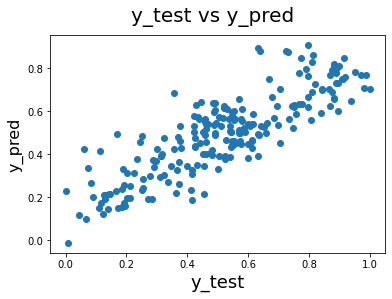

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [84]:
print(lm6.rsquared, lm6.rsquared_adj)

0.757740051453844 0.7553366789484258


In [90]:
print("R-Squard : {}".format(lm6.rsquared))
print("Adjusted R-Squard : {}".format(lm6.rsquared_adj))
print("MSE : {}".format(mean_squared_error(y_test,y_pred)))
print("RMSE : {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))

R-Squard : 0.757740051453844
Adjusted R-Squard : 0.7553366789484258
MSE : 0.016887859686100334
RMSE : 0.12995329809627892


In [89]:
print("MSE value: {}".format(mean_squared_error(y_test,y_pred)))
print("RMSE value: {}".format(math.sqrt(mean_squared_error(y_test,y_pred))))

MSE value: 0.016887859686100334
RMSE value: 0.12995329809627892
